In [1]:
# newspaper is a package that scrapes articles off websites
import newspaper
from newspaper import Article
from newspaper import Source

# nltk is a dependency of newspaper that must be installed
import nltk

# we all know and love pandas!
import pandas as pd

# another plotting tool
import seaborn as sns

# another plotting tool
import matplotlib.pyplot as plt

In [2]:
# this function accepts two parameters: 
# name: string that provides the name of the media source
# source: a <class 'newspaper.source.Source'> object 
# limit: how many articles to return in the dataframe

def create_article_dataframe(name, source, l):
    
    # if no limit is specified then we exhaust all articles in the source
    limit = float("inf") if l is None else l
    count = 0
    
    # init dataframe
    articles = pd.DataFrame(columns = ['name', 'title', 'authors', 'text', 'keywords', 'summary', 'published_date', 'source'])

    # arrays use to accumulate data that will be later put in dataframe
    names = []
    titles = []
    authors = []
    text = []
    keywords = []
    summaries = []
    published_dates = []
    sources = []

    for article in source.articles:

        if count >= limit: break
        
        # downloads HTML for the article
        article.download()
        # parses HTML for fields like title, authors, text, and publish_date
        article.parse()
        # performs NLP to determine properties like keywords and develops a summary field
        article.nlp()
        
        # append values generated above to the array
        names.append(name)
        titles.append(article.title.lower())
        authors.append(article.authors)
        text.append(article.text.lower())
        keywords.append(list(map(lambda x: x.lower(), article.keywords)))
        summaries.append(article.summary.lower())
        published_dates.append(article.publish_date)
        sources.append(article.source_url)

        count += 1
    
    # build dataframe using the arrays
    articles["name"] = names
    articles["title"] = titles
    articles["authors"] = authors
    articles["text"] = text
    articles["keywords"] = keywords
    articles["summary"] = summaries
    articles["published_date"] = published_dates
    articles["source"] = sources
    return articles

In [3]:
cnn = newspaper.build("https://www.cnn.com/specials/world/coronavirus-outbreak-intl-hnk", memoize_articles=False)
onion = newspaper.build("https://www.theonion.com/tag/coronavirus", memoize_articles=False)
nyt = newspaper.build("https://www.nytimes.com/search?query=covid", memoize_articles=False)
wp = newspaper.build("https://www.washingtonpost.com/newssearch/?query=covid&btn-search=&sort=Relevance&datefilter=All%20Since%202005", memoize_articles=False)
nbc = newspaper.build("https://www.nbcnews.com/search/?q=covid", memoize_articles=False)
fox = newspaper.build("https://www.foxnews.com/search-results/search?q=covid", memoize_articles=False)
abc = newspaper.build("https://abcnews.go.com/search?searchtext=covid", memoize_articles=False)
npr = newspaper.build("https://www.npr.org/search?query=covid&page=1", memoize_articles=False)
us = newspaper.build("https://www.usnews.com/search/news?q=covid#gsc.tab=0&gsc.q=covid&gsc.page=1", memoize_articles=False)
natural = newspaper.build("https://www.naturalnews.com/search.asp?query=covid", memoize_articles=False)

cnn_articles = create_article_dataframe("cnn", cnn, 50)
onion_articles = create_article_dataframe("onion", onion, 50)
nyt_articles = create_article_dataframe("nyt", nyt, 50)
wp_articles = create_article_dataframe("wp", wp, 50)
nbc_articles = create_article_dataframe("nbc", nbc, 50)
fox_articles = create_article_dataframe("fox", fox, 50)
abc_articles = create_article_dataframe("abc", abc, 50)
us_articles = create_article_dataframe("us", us, 50)
natural_articles = create_article_dataframe("natural", natural, 50)

In [10]:
def cleanText(df):
    df['text'] = df['title'] + " " + df['text']
    for index, data in df.iterrows():
        if data["text"] is not None:
            data["text"] = data['text'].replace('[^\w\s]','').lower()

In [33]:
def countNullTextFields(df):
    count = 0
    for index, data in df.iterrows():
        if data["text"] is None or data["text"].strip() == "":
            count += 1
    return count

In [34]:
cleanText(cnn_articles)
cleanText(onion_articles)
cleanText(nyt_articles)
cleanText(wp_articles)
cleanText(nbc_articles)
cleanText(fox_articles)
cleanText(abc_articles)
cleanText(us_articles)
cleanText(natural_articles)

In [39]:
count = 0
count += countNullTextFields(cnn_articles)
count += countNullTextFields(onion_articles)
count += countNullTextFields(nyt_articles)
count += countNullTextFields(wp_articles)
count += countNullTextFields(nbc_articles)
count += countNullTextFields(fox_articles)
count += countNullTextFields(abc_articles)
count += countNullTextFields(us_articles)
count += countNullTextFields(natural_articles)

print("There are ", count, " text fields consisting of NaN values or empty strings.")

There are  0  text fields consisting of NaN values or empty strings.


In [ ]:
# make box plot analzing min and max lengths of these articles
# can analyze sentiment of these articles later on I think

In [5]:
# create a master dataframe with all the articles
articles = pd.DataFrame(columns = ['name', 'title', 'authors', 'text', 'summary', 'published_date', 'source'])
articles = articles.append(cnn_articles)
articles = articles.append(onion_articles)
articles = articles.append(nyt_articles)
articles = articles.append(wp_articles)
articles = articles.append(nbc_articles)
articles = articles.append(fox_articles)
articles = articles.append(abc_articles)
articles = articles.append(us_articles)
articles = articles.append(natural_articles)

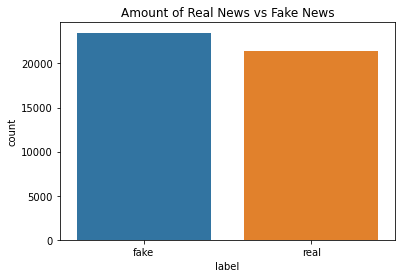

In [8]:
# so we collected a lot of data on stuff we want to test
# lets use an existing dataset that can train a model to detect real and fake news

# label all fakes new with 'fake' 
fake_news = pd.read_csv("news_dataset/Fake.csv")
fake_news['label'] = "fake"

# label all real news with 'real'
real_news = pd.read_csv("news_dataset/True.csv")
real_news['label'] = "real"

news_data = pd.concat([fake_news, real_news])

# graph amount of fake vs real news in dataset
plt.title("Amount of Real News vs Fake News")
sns.countplot(news_data['label'])
plt.show()

# The plot below displays that there are a couple thousand more
# fake news items than real news items in the dataset, but in general
# the dataset is pretty balanced.

In [9]:
# convert Fake and True labels into a binary (0, 1) so we can 
# utilize the data in a classification model to make predictions
fake_news['label'] = 0
real_news['label'] = 1
news_data = pd.concat([fake_news, real_news])

In [15]:
# stopwords are words which are filtered out before or after processing NLP
from nltk.corpus import stopwords
nltk.download('stopwords')
# wordcloud visualization package
from wordcloud import WordCloud

def show_wordcloud(data, title=None):
    # build wordcloud
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords.words('english'),
        max_words=200,
        max_font_size=40, 
        scale=3
    ).generate(str(data))
    
    # plot wordcloud
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kurnalsaini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


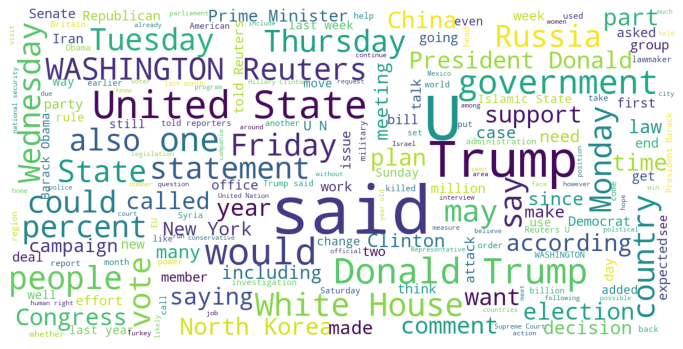

In [16]:
# wordcloud showcasing prominent words in real news
show_wordcloud("".join(news_data[news_data["label"] == 1].text))

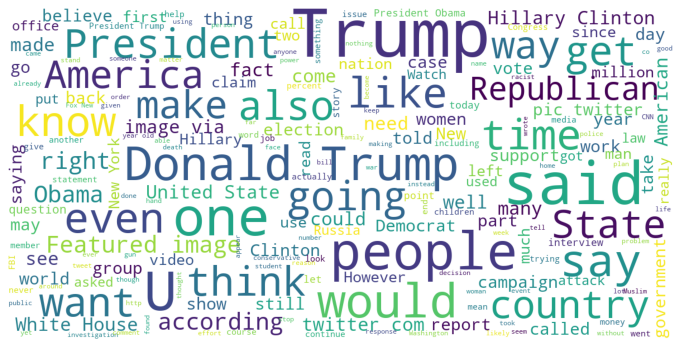

In [17]:
# wordcloud showcasing prominent words in fake news
show_wordcloud("".join(news_data[news_data["label"] == 0].text))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

x_train, x_test, y_train, y_test = train_test_split(news_data['text'], news_data['label'], 
                                                    test_size=0.2, random_state=1)

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy_score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % (accuracy_score * 100) + "%")

accuracy: 99.388%


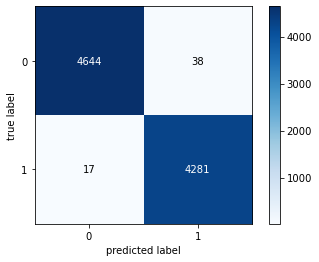

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(conf_mat=cm, colorbar=True)
plt.show()

In [35]:
natural_articles['text'] = natural_articles['title'] + " " + natural_articles['text']
natural_news_text = natural_articles.iloc[ : , 3]
pred = model.predict(natural_news_text)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [34]:
onion_articles['text'] = onion_articles['title'] + " " + onion_articles['text']
onion_news_text = onion_articles.iloc[ : , 3]
pred = model.predict(natural_news_text)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [39]:
fox_articles['text'] = fox_articles['text']
fox_news_text = fox_articles.iloc[ : , 3]
pred = model.predict(fox_news_text)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
cnn_articles['text'] = cnn_articles['text']
cnn_news_text = cnn_articles.iloc[ : , 3]
pred = model.predict(cnn_news_text)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [41]:
nyt_articles['text'] = nyt_articles['text']
nyt_news_text = nyt_articles.iloc[ : , 3]
pred = model.predict(nyt_news_text)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0])

In [ ]:
# harvard 